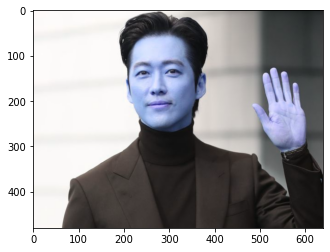

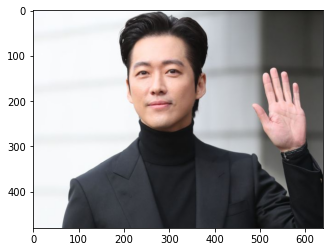

rectangles[[(201, 98) (356, 253)]]


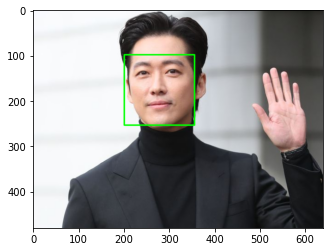

68


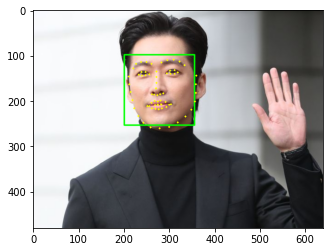

(271, 172)
고양이 스티커 가로 (x,y) : (271,172)
고양이 스티커 세로 (w,h) : (112,78)
(78, 112, 3)


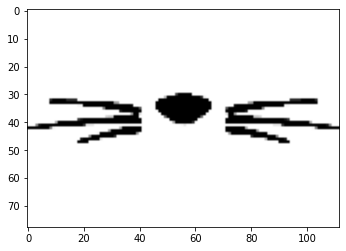

리사이즈 (x,y) : (215,133)
(78, 112, 3)


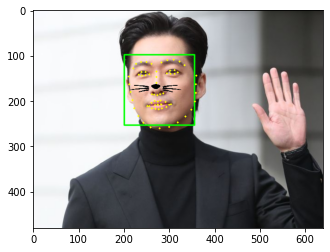

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib


my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGR -> RGB 변환
plt.imshow(img_rgb)
plt.show()


detector_hog = dlib.get_frontal_face_detector()   #- detector 선언


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)


print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 붙이는 과정

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark: # 랜드마크 색깔 지정
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # BGR을 RGB로 변환
plt.imshow(img_show_rgb)
plt.show() # 파란맛 이미지 출력

# 스티커 적용하기
# 코끝 좌표, 고양이 수염 이미지 사이즈 설정
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index
    x = landmark[30][0] # 수염의 중앙 x 좌표값
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[2][0]) * 2
    h = (landmark[48][1] - landmark[30][1]) * 2
    print ('고양이 스티커 가로 (x,y) : (%d,%d)'%(x,y)) 
    print ('고양이 스티커 세로 (w,h) : (%d,%d)'%(w,h))
    

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

refined_x = x - w // 2  # left 
refined_y = y - h // 2     # top
print ('리사이즈 (x,y) : (%d,%d)'%(refined_x, refined_y))


if (refined_y < 0):
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)


# 원본 이미지에 스티커 적용하기
sticker_area = img_show[refined_y:refined_y + h, refined_x:refined_x + w]    # 원본 이미지에 스티커를 적용시킬 부분
img_show[refined_y:refined_y + h, refined_x:refined_x + w] = \
    np.where(img_sticker == 255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
